### About the Dataset
#### Kaggle dataset : [Download The Dataset Here ](https://www.kaggle.com/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/discussion/310030)

#### Description
This dataset contains 1.2M distinct tweets about the current ongoing Ukraine-Russia conflict.

Implementation
Two Jupyter notebooks running 24/7, executing every 15 mins monitoring hashtags pertaining to the ongoing Ukraine-Russia conflict. The dataset creator also implemented a simple "hashtag crawler" where the dataset creator crawled the top-most hashtags from an initial set of hashtags thus getting the other related hashtags at a given point in time.

In [12]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 

In [4]:
tweets_df = pd.read_csv('resources/dataset/UkraineCombinedTweetsDeduped20220227-131611.csv')
tweets_df.shape

/Users/floramatos/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1229349, 18)

In [29]:
len(tweets_df['language'].unique())

64

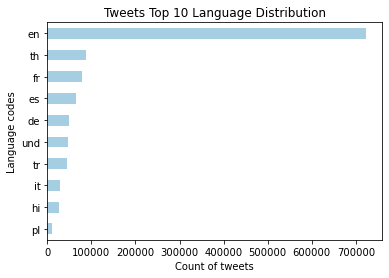

In [30]:
language = tweets_df['language'].value_counts()
language[0:10].sort_values().plot(kind='barh', title='Tweets Top 10 Language Distribution', colormap='Paired')
plt.ylabel('Language codes')
plt.xlabel('Count of tweets')
plt.show()

In [31]:
# total number of tweets in English laguage (relevant to this project)
en_tweets_df = tweets_df[tweets_df['language']=='en']
len(en_tweets_df)

723256

In [36]:
len(en_tweets_df["location"].unique())

106918

In [37]:
location = en_tweets_df['location'].value_counts()
location[0:10]

United States       7160
India               6407
London, England     3112
USA                 2788
United Kingdom      2608
Canada              2565
New Delhi, India    2492
London              2369
California, USA     2337
Lagos, Nigeria      2091
Name: location, dtype: int64

In [32]:
# Drop rows where location is NaN or blank
en_tweets_df['location'].isna().sum()
en_tweets_df = en_tweets_df[en_tweets_df['location'].notna()]

In [33]:
# create a csv of english tweets where location is not null
en_tweets_df.to_csv('en_tweets.csv', index=False)

In [35]:
# Drop all unnecessary columns: userid, username, acctdesc, usercreatedts, language, favorite_count, extractedts, coordinates
en_tweets_df = en_tweets_df[['location','tweetcreatedts','text']]
en_tweets_df.shape

(440489, 3)

In [38]:
# Convert column "location" into country names
def country_column(df):
    # select countries to be included in the filtered df
    country_list = ["usa","england","united states","united kingdom","" "uk", "india", "canada", "nigeria", 
    "ukraine", "russia", "poland", "pakistan", "china", "finland", "romania", 
    "australia", "hungary", "new zealand"]
    # create an empty list to hold dataframes
    df_list = []
    # loop through the country list
    for i in country_list:
        # filter the the df by country
        filtered_df = df[df['location'].str.contains(i, case=False, na = False)]
        # assign label to country column 
        filtered_df['country'] = i
        # append filtered df to df_list
        df_list.append(filtered_df)
        # join dfs in df_list
        df = pd.concat(df_list)
    return df

In [39]:
# small code to supress warnings for the ease of viewing data
import warnings
warnings.filterwarnings("ignore")
# apply function to create column country
country_wise_tweets = country_column(en_tweets_df)
country_wise_tweets.head()

,location,tweetcreatedts,text,country
60,"Texas, USA",2022-02-24 06:48:06.000000,Real #Americans stand #UnitedWithBiden AGAINST...,usa
217,"California, USA",2022-02-24 06:48:13.000000,"SPREAD AND SHARE, YOU CAN HELP UKRAINE #Ukrain...",usa
244,"Florida, USA",2022-02-24 06:48:15.000000,"Cruise missile flying over Kherson, Ukraine. #...",usa
255,"New York, USA",2022-02-24 06:48:15.000000,🇷🇺 Russian MLRS fire out of Belgorod toward Uk...,usa
265,USA,2022-02-24 06:48:16.000000,"My heart goes out to the people in #Ukaraine, ...",usa


In [53]:
country_wise_tweets['country'].value_counts()

usa               26756
india               331
canada               91
uk                   80
england              34
ukraine              22
nigeria              21
united states        17
australia             9
russia                8
united kingdom        6
china                 4
poland                4
pakistan              3
new zealand           1
Name: country, dtype: int64

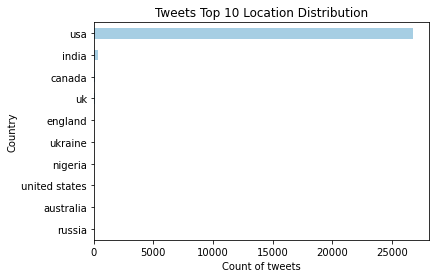

In [52]:
country = country_wise_tweets['country'].value_counts()
country[0:10].sort_values().plot(kind='barh', title='Tweets Top 10 Location Distribution', colormap='Paired')
plt.ylabel('Country')
plt.xlabel('Count of tweets')
plt.show()

### Create and Clean a sample data set of English tweets from USA 

### NOTE: (Add to final report)

- News Tweets are about 1% of the entire dataset and hence assumed to not affect the analysis results. 

- Also, it is difficult to distinguish between the actual news tweets and private accounts sharing news.

### Data Cleaning

- #### Lowering Case : 

The words, ‘Tweet’, ‘TWEET’, and ‘tweet’ all add the same value to a sentence.Lowering the case of all the words helps to reduce the dimensions by decreasing the size of the vocabulary.

#### Lower the case

#### Remove mentions 

#### Remove hyperlinks

#### Remove special characters

#### Store cleaned tweets in csv

#### Cleaned tweets df preview

In [40]:
import re

def text_cleaning(df, column_name):

# convert all text to lower case
    df = df[column_name].str.lower().to_frame() # returns a series object
    df = df[column_name].str.replace(r"@[A-Za-z0-9_]+","", regex = True).to_frame() # remove mentions
    df = df[column_name].str.replace(r"#[A-Za-z0-9_]+","", regex=True).to_frame() # remove hashtags
    df = df[column_name].str.replace(r"http\S+|www.\S+","",regex=True).to_frame() # remove hyperlinks
    df = df[column_name].str.replace(r"[^\w\s]|_|\d+|[^a-zA-Z]"," ",regex=True).to_frame() # remove punctuations

    return df    # convert the series object back into a dataframe

# clean the tweets using function
clean_tweets = text_cleaning(en_tweets_df, 'text')
clean_tweets.head()

,text
5,a cruise missile fired by the russian army fel...
13,spread and share you can help ukraine
14,footage of the airport bombing in ivano franki...
16,now this is wrong absolutely wrong for ...
18,rd mechanized brigade continues to suffer ...


In [ ]:
clean_tweets.shape

(440489, 1)

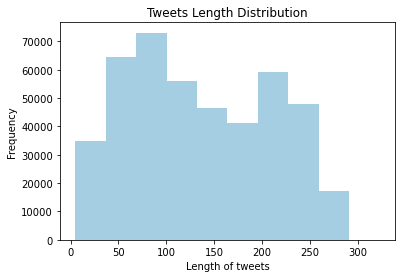

In [56]:
# plot the length of the tweet
clean_tweets['length']= clean_tweets['text'].apply(len)
clean_tweets['length'].plot(kind='hist', title='Tweets Length Distribution', colormap='Paired')
plt.xlabel('Length of tweets')
plt.show()

### Data Cleaning Complete


### Next : Vader Sentiment Analysis

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is fully open-sourced under the [MIT License] 

In [ ]:
# import dependencies, modules required for sentiment analysis from vader package which is 
# previously installed in the python environment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# generate sentiment for all the sentnces present in the data set
def sentiment_scores(df, column_name):
    sentiment_score_list=[]
    for row in df[column_name]:
        vader_sentiment = analyzer.polarity_scores(row)
        sentiment_score_list.append(vader_sentiment)
    return pd.DataFrame(sentiment_score_list)
    
# Let us create sentiment dataframe for tweets using above function
sentiments_df = sentiment_scores(clean_tweets,'text')
sentiments_df.head(10)

,neg,neu,pos,compound
0,0.265,0.735,0.000,-0.5574
1,0.000,0.505,0.495,0.5994
2,0.000,1.000,0.000,0.0000
3,0.282,0.718,0.000,-0.9117
4,0.437,0.563,0.000,-0.7351
5,0.226,0.730,0.044,-0.8173
6,0.000,0.932,0.068,0.4019
7,0.559,0.441,0.000,-0.5859
8,0.000,1.000,0.000,0.0000
9,0.000,0.417,0.583,0.6369


In [ ]:
# merge sentiment scores with corresponding tweets

tweet_sentiments_df = pd.concat([clean_tweets.reset_index(drop=True),sentiments_df],axis=1)
tweet_sentiments_df.head(10)

,text,neg,neu,pos,compound
0,a cruise missile fired by the russian army fel...,0.265,0.735,0.000,-0.5574
1,spread and share you can help ukraine,0.000,0.505,0.495,0.5994
2,footage of the airport bombing in ivano franki...,0.000,1.000,0.000,0.0000
3,now this is wrong absolutely wrong for ...,0.282,0.718,0.000,-0.9117
4,rd mechanized brigade continues to suffer ...,0.437,0.563,0.000,-0.7351
5,the world must act immediately is at stake ...,0.226,0.730,0.044,-0.8173
6,the historic moment when the pm of pakistan mr...,0.000,0.932,0.068,0.4019
7,from poetry of bitch ...,0.559,0.441,0.000,-0.5859
8,footage of the airport bombing in ivano franki...,0.000,1.000,0.000,0.0000
9,i love shou toramaru,0.000,0.417,0.583,0.6369


In [ ]:
# convert scores into positive, neutral, negative 

# create a list of conditions
conditions = [
              (tweet_sentiments_df['compound'] < 0),
              (tweet_sentiments_df['compound'] == 0),
              (tweet_sentiments_df['compound'] > 0)
              ]

# create a list of values corresponding with each condition
values = ['negative','neutral','positive']


tweet_sentiments_df['sentiment'] = np.select(conditions, values)
tweet_sentiments_df.head()

,text,neg,neu,pos,compound,sentiment
0,a cruise missile fired by the russian army fel...,0.265,0.735,0.000,-0.5574,negative
1,spread and share you can help ukraine,0.000,0.505,0.495,0.5994,positive
2,footage of the airport bombing in ivano franki...,0.000,1.000,0.000,0.0000,neutral
3,now this is wrong absolutely wrong for ...,0.282,0.718,0.000,-0.9117,negative
4,rd mechanized brigade continues to suffer ...,0.437,0.563,0.000,-0.7351,negative


In [ ]:
# save the 

<AxesSubplot:>

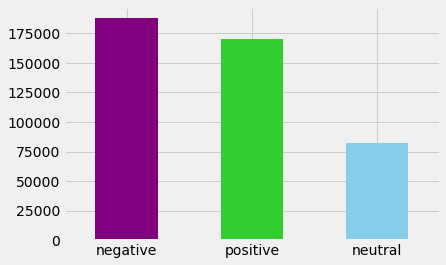

In [ ]:
# import dependencies for visualization
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Vizualization

results = tweet_sentiments_df['sentiment'].value_counts()
results.plot(kind='bar',rot=0,color=['purple','limegreen','skyblue'])